In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("Simple_Data_Linear_Regression.csv",delimiter=",") #if locally saved
# otherwise download https://github.com/Alex-ley/Machine_learning_articles/blob/Part-2/Simple_Data_Linear_Regression.csv
# or use directly https://raw.githubusercontent.com/Alex-ley/Machine_learning_articles/Part-2/Simple_Data_Linear_Regression.csv
iterations = 500
learning_rate = 0.05
initial_m = 0
initial_b = 0

In [3]:
data

array([[ 1. ,  4. ],
       [ 1.2,  5.5],
       [ 2. ,  6. ],
       [ 2.1,  7. ],
       [ 2.5,  8.5],
       [ 3.1,  7.2],
       [ 3.5,  9. ],
       [ 4. , 11.4],
       [ 4.2, 11. ],
       [ 4.6, 12.5],
       [ 5. , 13. ]])

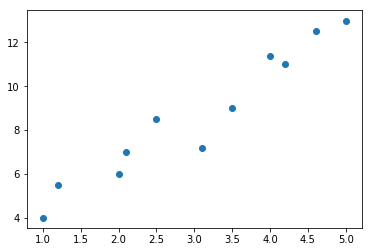

In [4]:
X_act = data[:,0]
Y_act = data[:,1]
plt.scatter(x=X_act,y=Y_act)

In [5]:
X = X_act.reshape(-1,1) # reshape turns the array into a 1-D Matrix (x matrix)
ones_v = np.ones([X.shape[0], 1]) # create a array containing only ones (to multiply by b or theta-0)
ones_h = ones_v.reshape(1,-1) # create a array containing only ones (to multiply by the feature matrix)
X = np.concatenate([ones_v, X],1) # cocatenate the ones to X matrix
y = Y_act.reshape(-1,1) # create the y matrix, -1 tells numpy to figure out the dimension by itself
initial_theta = np.array([[0,0]])

In [6]:
ones_h, initial_theta

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[0, 0]]))

In [7]:
def computeCostAndDerivatives(X,y,theta,learning_rate):
    cost = ones_h @ (np.power((X @ theta.T - y),2)) # @ makes np perform matrix multiplication        
    avg_cost = cost / float(len(X))
    
    theta = theta - ((2*learning_rate)/len(X)) * ones_h@((X @ theta.T - y)*X) #brackets are very important for Matrix algebra here
    
    return avg_cost, theta

In [20]:
#example theta derivatives calculation
test_x = np.array([[1,1],[1,2],[1,3]])
test_y_error = np.array([[2],[2],[2]])
test_y_error * test_x # = test_x * test_y_error

array([[2, 2],
       [2, 4],
       [2, 6]])

In [22]:
test_ones_h = np.array([[1,1,1]])
test_ones_h @ (test_y_error * test_x)

array([[ 6, 12]])

In [8]:
avg_cost, theta = computeCostAndDerivatives(X,y,initial_theta,learning_rate)

In [9]:
avg_cost, theta

(array([[82.95909091]]), array([[0.86454545, 2.96972727]]))

In [10]:
def gradientDescent(X,y,theta,iterations,learning_rate):
    avg_cost_array = []
    for i in range(iterations):
        avg_cost, theta = computeCostAndDerivatives(X,y,theta,learning_rate)
        avg_cost_array.append(avg_cost)
    return avg_cost, theta, avg_cost_array

In [11]:
avg_cost, final_theta, avg_cost_array = gradientDescent(X,y,initial_theta,iterations,learning_rate)

In [12]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} theta={final_theta}")

after 500 iterations, the avg_cost=[[0.51678588]] theta=[[2.19687975 2.13652783]]


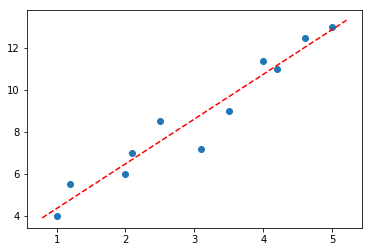

In [13]:
plt.scatter(X_act, Y_act)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
x_vals_matrix = np.concatenate([np.ones([2,1]),x_vals.reshape(-1,1)],1)
# y_vals = final_theta[0][1]* x_vals + final_theta[0][0] #this is a simple case when x = mx + b
y_vals = ((x_vals_matrix @ final_theta.T).T).flatten() #this is a more general case using matrix algebra
plt.plot(x_vals, y_vals, 'r--')

Text(0, 0.5, 'Avg_cost')

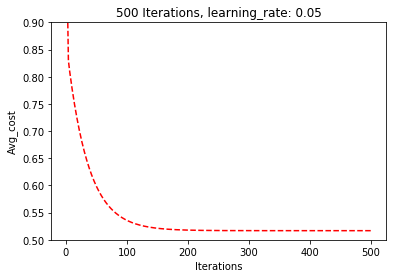

In [14]:
epochs = np.array(np.linspace(1,iterations,num=iterations)).reshape(-1,1)
y_axis_cost = np.array(avg_cost_array,dtype='object').reshape(-1,1) #dtype= np.longdouble np.float64 etc.
plt.title(f"500 Iterations, learning_rate: {learning_rate}")
plt.ylim((0.5,0.9))
plt.plot(epochs, y_axis_cost , 'r--')
plt.xlabel('Iterations')
plt.ylabel('Avg_cost')